<a href="https://colab.research.google.com/github/loisll/MMAI831/blob/main/Assignment5_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import yfinance as yf
from datetime import datetime

##Download the current futures prices for the following underlying with all maturities:
•	Gold

•	Crude Oil

•	Natural gas

•	SP 500

Comments on the price pattern for different maturities (e.g., normal backwardation? Contango?)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Gold
Crude Oil
Natural Gas
S&P 500


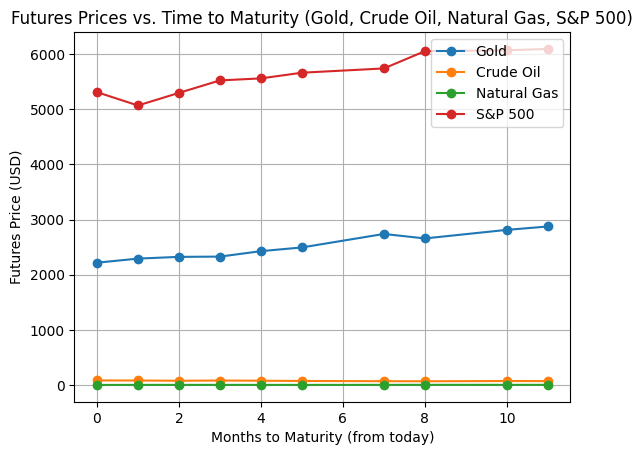

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Define Futures Symbols
futures_symbols = {
    "Gold": "GC=F",
    "Crude Oil": "CL=F",
    "Natural Gas" : "NG=F",
    "S&P 500": "ES=F"

}

# Create an empty dictionary to store futures data
futures_data = {}

# Fetch futures data for each commodity
for commodity, symbol in futures_symbols.items():
    try:
        futures = yf.download(symbol, period="1y", interval="1mo")["Close"]
        futures = futures.reset_index()
        futures["Months to Maturity"] = (futures["Date"] - futures["Date"].min()).dt.days // 30
        futures_data[commodity] = futures
    except Exception as e:
        print(f"Could not retrieve data for {commodity}: {e}")

for commodity, symbol in futures_symbols.items():
#for commodity in futures_data["Commodity"].unique():
    print(commodity)
    subset = futures_data[commodity]
    plt.plot(subset["Months to Maturity"], subset[symbol], marker='o', linestyle='-', label=commodity)

# Formatting the plot
plt.xlabel("Months to Maturity (from today)")
plt.ylabel("Futures Price (USD)")
plt.title("Futures Prices vs. Time to Maturity (Gold, Crude Oil, Natural Gas, S&P 500)")
plt.legend()
plt.grid(True)

# Show the plot

###Front Month Crude Oil Futures

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

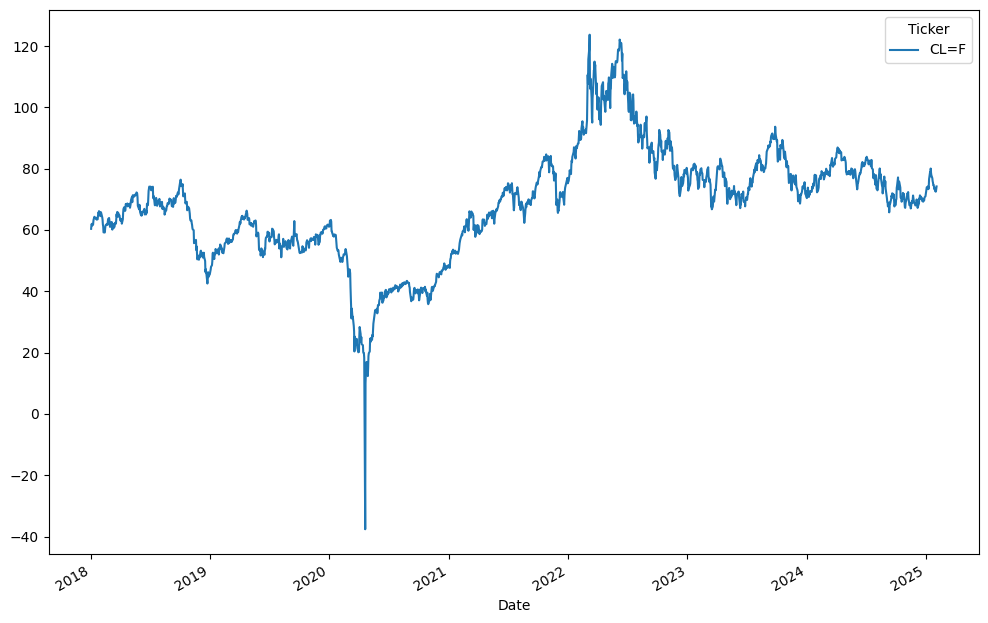

In [ ]:
data = yf.download("CL=F", start="2018-01-01")
data['Close'].plot(figsize=(12,8))

##Download options data

###Look at SP500 options

In [ ]:
spx=yf.Ticker('^SPX')
spx.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 6071.17,
 'open': 6096.79,
 'dayLow': 6030.93,
 'dayHigh': 6120.91,
 'regularMarketPreviousClose': 6071.17,
 'regularMarketOpen': 6096.79,
 'regularMarketDayLow': 6030.93,
 'regularMarketDayHigh': 6120.91,
 'volume': 3544083000,
 'regularMarketVolume': 3544083000,
 'averageVolume': 4250163500,
 'averageVolume10days': 4530538000,
 'averageDailyVolume10Day': 4530538000,
 'bid': 5980.58,
 'ask': 6098.92,
 'fiftyTwoWeekLow': 4918.09,
 'fiftyTwoWeekHigh': 6128.18,
 'fiftyDayAverage': 5990.1055,
 'twoHundredDayAverage': 5629.9536,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailing

In [ ]:
spx.options

('2025-02-03',
 '2025-02-04',
 '2025-02-05',
 '2025-02-06',
 '2025-02-07',
 '2025-02-10',
 '2025-02-11',
 '2025-02-12',
 '2025-02-13',
 '2025-02-14',
 '2025-02-18',
 '2025-02-19',
 '2025-02-20',
 '2025-02-21',
 '2025-02-24',
 '2025-02-25',
 '2025-02-26',
 '2025-02-27',
 '2025-02-28',
 '2025-03-03',
 '2025-03-04',
 '2025-03-05',
 '2025-03-06',
 '2025-03-07',
 '2025-03-10',
 '2025-03-11',
 '2025-03-14',
 '2025-03-17',
 '2025-03-21',
 '2025-03-28',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2025-12-31',
 '2026-01-16',
 '2026-02-20',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21',
 '2030-12-20')

In [ ]:
#Options expiring on a particular date - OPtion Chain
opt_chain = spx.option_chain(date='2025-09-30')
opt_chain

Options(calls=          contractSymbol             lastTradeDate  strike  lastPrice  \
0    SPXW250930C01200000 2025-01-08 03:46:14+00:00  1200.0    4725.80   
1    SPXW250930C01400000 2025-01-08 04:02:40+00:00  1400.0    4533.70   
2    SPXW250930C01600000 2025-01-08 05:08:27+00:00  1600.0    4340.30   
3    SPXW250930C02200000 2024-10-22 15:32:52+00:00  2200.0    3699.18   
4    SPXW250930C02400000 2024-10-22 15:32:52+00:00  2400.0    3508.91   
..                   ...                       ...     ...        ...   
107  SPXW250930C07400000 2025-01-31 18:36:09+00:00  7400.0       6.58   
108  SPXW250930C07500000 2025-01-31 17:18:17+00:00  7500.0       5.20   
109  SPXW250930C07600000 2025-01-31 16:30:54+00:00  7600.0       3.90   
110  SPXW250930C07800000 2025-01-31 20:55:17+00:00  7800.0       1.95   
111  SPXW250930C08000000 2025-01-28 18:17:59+00:00  8000.0       1.70   

         bid      ask  change  percentChange  volume  openInterest  \
0    4825.40  4857.70    0.00       0.0

In [ ]:
opt_chain.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250930C01200000,2025-01-08 03:46:14+00:00,1200.0,4725.80,4825.40,4857.70,0.00,0.000000,10.0,16,0.697391,True,REGULAR,USD
1,SPXW250930C01400000,2025-01-08 04:02:40+00:00,1400.0,4533.70,4631.60,4664.00,0.00,0.000000,5.0,5,0.792666,True,REGULAR,USD
2,SPXW250930C01600000,2025-01-08 05:08:27+00:00,1600.0,4340.30,4437.90,4470.30,0.00,0.000000,5.0,6,0.789934,True,REGULAR,USD
3,SPXW250930C02200000,2024-10-22 15:32:52+00:00,2200.0,3699.18,3812.80,3845.20,0.00,0.000000,NaN,1,0.524297,True,REGULAR,USD
4,SPXW250930C02400000,2024-10-22 15:32:52+00:00,2400.0,3508.91,3621.90,3654.40,0.00,0.000000,NaN,1,0.562359,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,SPXW250930C07400000,2025-01-31 18:36:09+00:00,7400.0,6.58,5.30,6.20,0.41,6.645054,7.0,72,0.126352,False,REGULAR,USD
108,SPXW250930C07500000,2025-01-31 17:18:17+00:00,7500.0,5.20,3.90,4.60,1.30,33.333324,3.0,51,0.127275,False,REGULAR,USD
109,SPXW250930C07600000,2025-01-31 16:30:54+00:00,7600.0,3.90,2.95,3.60,-0.42,-9.722224,3.0,204,0.129182,False,REGULAR,USD
110,SPXW250930C07800000,2025-01-31 20:55:17+00:00,7800.0,1.95,1.80,2.45,-0.35,-15.217388,5.0,43,0.134500,False,REGULAR,USD


In [ ]:
opt_chain.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250930P01200000,2024-12-26 19:40:48+00:00,1200.0,1.40,0.95,1.25,0.0,0.0,8.0,120,0.707889,False,REGULAR,USD
1,SPXW250930P01400000,2025-01-30 16:50:09+00:00,1400.0,1.35,1.25,1.80,0.0,0.0,2.0,31,0.662418,False,REGULAR,USD
2,SPXW250930P01600000,2025-01-27 19:40:50+00:00,1600.0,2.14,1.80,2.35,0.0,0.0,7.0,73,0.623051,False,REGULAR,USD
3,SPXW250930P01800000,2025-01-27 19:40:50+00:00,1800.0,2.85,2.45,3.10,0.0,0.0,7.0,222,0.588078,False,REGULAR,USD
4,SPXW250930P02000000,2025-01-27 19:40:50+00:00,2000.0,3.75,3.20,3.70,0.0,0.0,7.0,8479,0.552678,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,SPXW250930P07000000,2024-11-06 17:57:30+00:00,7000.0,881.15,758.10,790.80,0.0,0.0,3.0,3,0.000010,True,REGULAR,USD
192,SPXW250930P07100000,2024-10-10 13:30:19+00:00,7100.0,1090.48,838.40,949.60,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD
193,SPXW250930P07600000,2024-12-31 19:37:07+00:00,7600.0,1511.48,1361.50,1394.00,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
194,SPXW250930P07800000,2024-12-31 19:37:07+00:00,7800.0,1704.13,1554.70,1587.10,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD


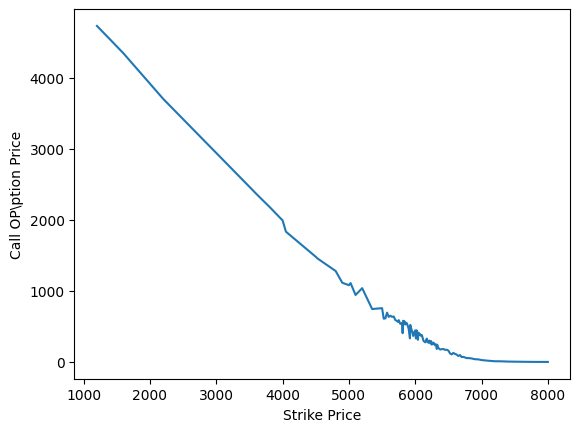

In [ ]:
plt.plot(opt_chain.calls.strike, opt_chain.calls.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Call OP\ption Price')
plt.show()

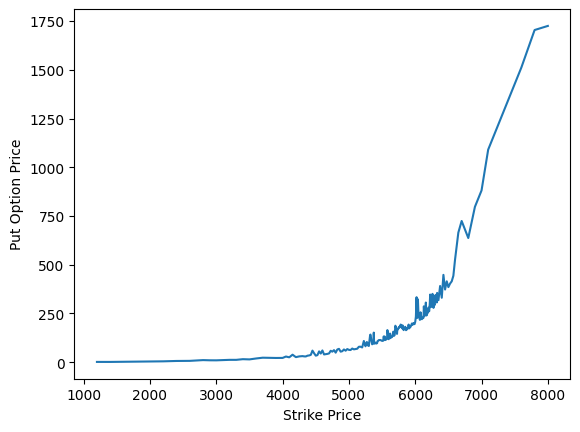

In [ ]:
plt.plot(opt_chain.puts.strike, opt_chain.puts.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.show()